### Installation and Setup

In [ ]:

# Montage de Google Drive pour accéder aux fichiers
from google.colab import drive
drive.mount('/content/drive')

# Changement du répertoire de travail vers le dossier contenant les fichiers
import os
os.chdir("/content/drive/MyDrive/yellow-it/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Installation de pdfminer.six pour extraire le texte des PDF
!pip install pdfminer.six

# # Installation de spaCy et téléchargement du modèle anglais 'en_core_web_sm'
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [ ]:
import re
from pdfminer.high_level import extract_text
import spacy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import numpy as np




## Parsing and Extracting Information from Resumes


### Functions for Parsing

In [ ]:

# Fonction pour extraire le texte d'un PDF
def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

# Fonction pour extraire les numéros de téléphone d'un texte
def extract_phone_numbers(text):
    pattern = r'\+?\d{1,3}[-.\s]?\(?\d{2,4}\)?[-.\s]?\d{2,4}[-.\s]?\d{2,9}'
    match = re.search(pattern, text)
    return match.group() if match else None

# Fonction pour extraire l'adresse email d'un texte
def extract_email_from_resume(text):
    pattern = r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b"
    match = re.search(pattern, text)
    return match.group() if match else None

# Fonction pour extraire les compétences d'un texte en utilisant une liste prédéfinie
def load_skills_from_csv(csv_file):
    # Charger le fichier CSV
    df = pd.read_csv(csv_file)
    # Supposons que la colonne contenant les compétences est nommée 'Skill'
    skills_list = df['Skill'].tolist()
    return skills_list

def extract_skills_from_resume(text, skills_list):
    skills_found = []

    for skill in skills_list:
        pattern = r"\b{}\b".format(re.escape(skill))
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            skills_found.append(skill)

    # Nettoyer les compétences trouvées
    cleaned_skills = list(set([skill.strip().replace('\n', '') for skill in skills_found if skill.strip()]))
    return cleaned_skills

# Fonction pour extraire les informations d'éducation d'un texte
def extract_education_from_resume(text):
    pattern = r"(?i)(?:\b(?:B\.?Sc\.?|Bac(?:calauréat|calaureate)?|Bachelor(?:'s)?|Licence|BTS)\b|(?:M\.?Sc\.?|Mast(?:er)?|Maîtrise)\b|(?:Ph\.?D\.?|Doctorate|Doctorat)\b)\s*(?:[a-zA-Z]+\s*)*(?:\b(?:en|in)\s*\b)?(?:[a-zA-Z]+\s*)*"
    edu_found= re.findall(pattern, text)
    cleaned_edu = list(set([edu.strip().replace('\n', '') for edu in edu_found if edu.strip()]))
    return cleaned_edu

# Fonction pour extraire le nom à partir d'un texte
def extract_name_from_resume(text):
    pattern = r"\b([A-Z][a-zA-Zéèêëàâäîïôöûüùç]+(?:\s[A-Z][a-zA-Zéèêëàâäîïôöûüùç]+){1,2}|[A-Z][a-zA-Zéèêëàâäîïôöûüùç]+(?:\s[A-Z]+)+)\b"
    match = re.search(pattern, text)
    return match.group() if match else None

# Fonction principale pour extraire toutes les informations d'un CV
def parse_resume(pdf_path, skills_csv):
    text = extract_text_from_pdf(pdf_path)
    skills_list = load_skills_from_csv(skills_csv)
    name = extract_name_from_resume(text)
    education = extract_education_from_resume(text)
    skills = extract_skills_from_resume(text, skills_list)
    email = extract_email_from_resume(text)
    phone = extract_phone_numbers(text)
    resume_data = {
        'Filename': pdf_path,
        'Text': text,
        'Name': name,
        'Education': education,
        'Skills': skills,
        'Email': email,
        'Phone': phone
    }
    print('kakakakakakaka', resume_data['Skills'][0])
    #df = pd.DataFrame([resume_data])
    return resume_data

def parse_resume_skills(pdf_path):
  skills_csv = "skills.csv"
  return parse_resume(pdf_path, skills_csv)


def parse_resume_text(text):
  skills_csv = "skills.csv"
  skills_list = load_skills_from_csv(skills_csv)
  name = extract_name_from_resume(text)
  education = extract_education_from_resume(text)
  skills = extract_skills_from_resume(text, skills_list)
  email = extract_email_from_resume(text)
  phone = extract_phone_numbers(text)
  resume_data = {
      'Name': name,
      'Education': education,
      'Skills': skills,
      'Email': email,
      'Phone': phone
  }

  #df = pd.DataFrame([resume_data])
  return resume_data





In [ ]:
text=extract_text("resumes/cv1.pdf")
test=parse_resume_text(text)
test

{'Name': 'Kalash Jindal',
 'Education': ['Master Course'],
 'Skills': ['decision trees',
  'design',
  'html',
  'modeling',
  'python',
  'ui',
  'c',
  'training',
  'pyqt',
  'programming',
  'keras',
  'computer science',
  'coding',
  'gensim',
  'analysis',
  'statistics',
  'machine learning',
  'engineering',
  'database',
  'chemicals',
  'prototype',
  'trees',
  'github',
  'css',
  'word',
  'testing',
  'algorithms',
  'gmail',
  'sci',
  'api',
  'opencv'],
 'Email': 'jindalkalash298@gmail.com',
 'Phone': '+91-7839453651'}

In [ ]:
parse_resume_skills("resumes/cv1.pdf")

kakakakakakaka statistics


{'Filename': 'resumes/cv1.pdf',
 'Text': 'Kalash Jindal\xa0\n\n3rd year B Tech, Computer Science and Engineering\xa0\nFeroze Gandhi Institute of Engineering and Technology\xa0\n\n298, Thomsanganj, Sitapur\xa0\nUttar Pradesh, India\xa0\n+91-7839453651\xa0\njindalkalash298@gmail.com\xa0\nwww.linkedin.com/in/kalashj16/\xa0\n\nSKILLS\xa0\n\nPython, Statistics,  Data\xa0\n\nHandling, Data Visualization,\xa0\n\nLinear Algebra, Neural\xa0\n\nNetworks, Transfer Learning,\xa0\n\nFeature Extraction, Deep\xa0\n\nLearning, Sci-kit Learn, Keras,\xa0\n\nOpenCV, SQLite, Html, CSS, GUI\xa0\n\nusing Pyqt module, Git GitHub,\xa0\n\nC, C++, etc.\xa0\n\nHOBBIES\xa0\n\nTable Tennis, Cooking, Reading\xa0\n\nBooks, Web Surfing, etc.\xa0\n\nEDUCATION\xa0\n\n8.71/10.0 CGPA  (Up to 2nd year)\xa0\nFeroze Gandhi Institute Of Engineering and Technology,\xa0\nRaebareli — \u200bB tech Computer Science and Engineering\xa0\n\n2017 - Till Date\xa0\n\n84.4/100  Percentage\xa0\nAgarwal Public Inter College,\xa0\nSitapur 

### Batch Processing of Resumes

In [ ]:
# Répertoire contenant les CV
resume_dir = "resumes"

# Chemin vers le fichier CSV des compétences
skills_csv = "skills.csv"

# Fonction pour extraire toutes les informations des CV dans un répertoire
def extract_all_resumes(resume_dir, skills_csv):
    all_resumes_data = []
    for filename in os.listdir(resume_dir):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(resume_dir, filename)
            resume_data = parse_resume(pdf_path, skills_csv)
            all_resumes_data.append(resume_data)
    if all_resumes_data:
        all_resumes_df = pd.concat(all_resumes_data, ignore_index=True)
    else:
        all_resumes_df = pd.DataFrame()
    return all_resumes_df

# Appel de la fonction pour extraire tous les CV dans le dossier spécifié
all_resumes_df = extract_all_resumes(resume_dir, skills_csv)


In [ ]:
all_resumes_df

,Filename,Text,Name,Education,Skills,Email,Phone
0,resumes/cv-wiem.pdf,Personal profile \n\nI am a passionate softwar...,Business Information Systems,[Bachelor's Degree in Business Computing ...,"[french, communication, system, ui, github, hu...",wiembenmlouka@gmail.com,+216 24313044
1,resumes/cv-wiem2.pdf,Profile \n\nÉtudiante en 2ème année du program...,Wiem Ben Mlouka,[licence nationale en informatique de gestion ...,"[communication, certification, system, ui, git...",wiembenmlouka@gmail.com,+216 24313044
2,resumes/cv1.pdf,"Kalash Jindal \n\n3rd year B Tech, Computer Sc...",Kalash Jindal,[Master Course ],"[chemicals, machine learning, coding, pyqt, sc...",jindalkalash298@gmail.com,+91-7839453651
3,resumes/cv3.pdf,Sanket Sarwade\nData Scientist\n\nAs a highly ...,Sanket Sarwade\nData,[Bsc Microbiology\n\nSinhgad College of Scienc...,"[visualization\n, python\n, machine learning, ...",sanketsarwade111@gmail.com,7798248452
4,resumes/cv2.pdf,Raphaël MARTIN \nINTITULÉ DU POSTE / STAGE \n\...,Raphaël MARTIN,[Licence Pro Commerce et Distribution \n\nUniv...,"[orange, communication, ai, distribution]",raphael.martin@gnail.com,06 06 06 06
5,resumes/cv4.pdf,Alexandre DUPONT \nP O S T E O C C U P É \n...,Alexandre DUPONT,[Licence de sciences et techniques des activit...,"[p, ai, gmail, c]",prenom.nom@gmail.com,6 66 66 66
6,resumes/cv5.pdf,ç \n\nJade MARTIN \n\nAIDE-SOIGNANTE \n\nPROFI...,Jade MARTIN,[maîtrise parfaitement les gestes et les proto...,[],jade.martin@gnail.com,06 66 66 66
7,resumes/cv6.pdf,Marie DUPONT \n\nPOSTE OCCUPÉ/RECHERCHÉ \n\n06...,Marie DUPONT,[Maîtrise des techniques de soins du visage av...,[microsoft office],marie.dupont@mail.com,06 12 34 56
8,resumes/cv7.pdf,PROFIL \n\nInfirmière diplômée possédant plus ...,Pack Office,[Baccalauréat g],"[crm, excel]",alice.robert@mail.fr,6 66 66 66
9,resumes/cv8.pdf,Ryan Nelson\n\nF R E S H E R S O F T W A R E...,Ryan Nelson,[],"[ethics\n, p, machine learning, coding, try, f...",None,None


In [ ]:
all_resumes_df.to_csv("train-data.csv", index=False, escapechar='\\')

### Cosine Similarity and Recommendation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorisation des compétences pour calculer la similarité cosinus
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_resumes_df['Skills'].apply(lambda x: ' '.join(x)))

# Fonction pour recommander des CV basés sur un critère de recherche
def recommend_resumes(criteria, top_n=5):
    criteria_vector = vectorizer.transform([criteria])
    cosine_sim = cosine_similarity(criteria_vector, tfidf_matrix).flatten()
    all_resumes_df['Similarity'] = cosine_sim
    df_filtered = all_resumes_df[all_resumes_df['Similarity'] > 0]
    df_sorted = df_filtered.sort_values(by='Similarity', ascending=False).head(top_n)
    return df_sorted




NameError: name 'all_resumes_df' is not defined

In [ ]:
# Exemple d'utilisation de la fonction de recommandation


criteria = "communication"
recommended_resumes = recommend_resumes(criteria, top_n=5)
recommended_resumes

,Filename,Text,Name,Education,Skills,Email,Phone,Similarity
4,resumes/cv2.pdf,Raphaël MARTIN \nINTITULÉ DU POSTE / STAGE \n\...,Raphaël MARTIN,[Licence Pro Commerce et Distribution \n\nUniv...,"[orange, communication, ai, distribution]",raphael.martin@gnail.com,06 06 06 06,0.380186
1,resumes/cv-wiem2.pdf,Profile \n\nÉtudiante en 2ème année du program...,Wiem Ben Mlouka,[licence nationale en informatique de gestion ...,"[communication, certification, system, ui, git...",wiembenmlouka@gmail.com,+216 24313044,0.200573
15,resumes/cv14.pdf,Judy Bloggs \n10 Prospect \nRow Wilton \nCo...,Judy Bloggs,[],"[french, communication, mobile, administration...",judybloggs@mycit.ie,087 123456,0.177611
0,resumes/cv-wiem.pdf,Personal profile \n\nI am a passionate softwar...,Business Information Systems,[Bachelor's Degree in Business Computing ...,"[french, communication, system, ui, github, hu...",wiembenmlouka@gmail.com,+216 24313044,0.152839
3,resumes/cv3.pdf,Sanket Sarwade\nData Scientist\n\nAs a highly ...,Sanket Sarwade\nData,[Bsc Microbiology\n\nSinhgad College of Scienc...,"[visualization\n, python\n, machine learning, ...",sanketsarwade111@gmail.com,7798248452,0.084647


## loading training data + data preprocessing

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import numpy as np
import pandas as pd

df_resume = pd.read_csv("UpdatedResumeDataSet.csv")
data = df_resume
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
data.shape

(962, 2)

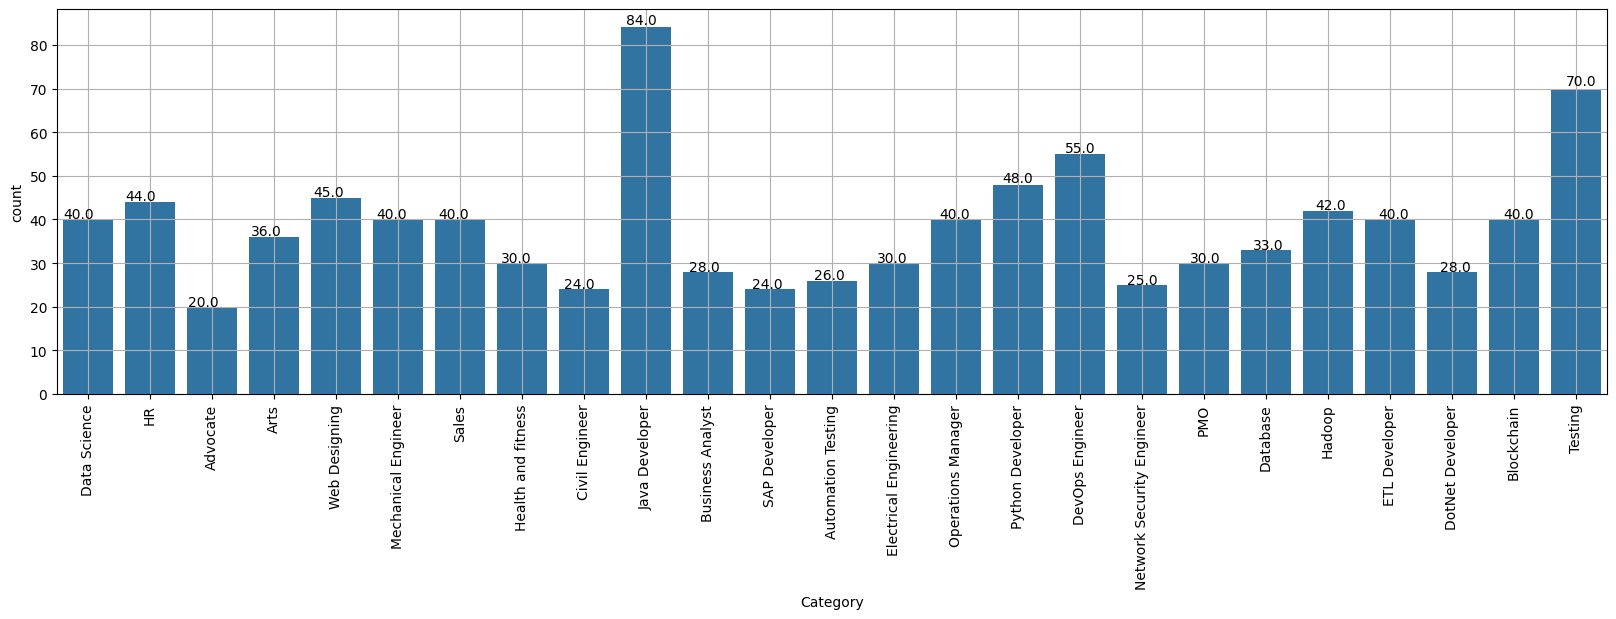

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df_resume)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [ ]:
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct

# Download stopwords
nltk.download('stopwords')

def text_preprocess(text):
    text = clean_html(text)
    text = remove_(text)
    text = removeStopWords(text)
    text = remove_digits(text)
    text = remove_links(text)
    text = remove_special_characters(text)
    text = punct(text)
    text = non_ascii(text)
    text = email_address(text)
    text = lower(text)
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Chargement des données
df_resume = pd.read_csv("UpdatedResumeDataSet.csv")
data = df_resume

# Nettoyage du texte des CV
# def clean_text(text):
#     text = re.sub(r'http\S+', ' ', text)  # remove URLs
#     text = re.sub(r'RT|cc', ' ', text)  # remove RT and cc
#     text = re.sub(r'#\S+', '', text)  # remove hashtags
#     text = re.sub(r'@\S+', '  ', text)  # remove mentions
#     text = re.sub(r'[^\w\s]', ' ', text)  # remove punctuation
#     text = re.sub(r'\d+', ' ', text)  # remove digits
#     text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
#     text = re.sub(r'[^\x00-\x7f]', r' ', text)  # remove non-ascii characters

#     text=text_preprocess(text)

#     return text.strip()



# ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Fonction améliorée pour nettoyer le texte
def clean_text(text):

    text = re.sub(r'http\S+', ' ', text)  # remove URLs
    text = re.sub(r'RT|cc', ' ', text)  # remove RT and cc
    text = re.sub(r'@\S+', '  ', text)  # remove mentions
    text = re.sub(r'[^\w\s]', ' ', text)  # remove punctuation
    text = re.sub(r'\d+', ' ', text)  # remove digits
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    text = re.sub(r'[^\x00-\x7f]', r' ', text)  # remove non-ascii characters

    text = clean_html(text)
    text = remove_(text)
    text = removeStopWords(text)
    text = remove_digits(text)
    text = remove_links(text)
    text = remove_special_characters(text)
    text = punct(text)
    text = non_ascii(text)
    text = email_address(text)
    text = lower(text)


    # Initialiser le PorterStemmer et le WordNetLemmatizer
    ps = PorterStemmer()
    wl = WordNetLemmatizer()

    # Définir les stopwords en anglais et enlever 'not'
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')

    # Supprimer les caractères non alphabétiques


    # Convertir le texte en minuscules et le séparer en mots
    words = text.split()

    # Supprimer les mots de moins de 3 caractères et les stopwords, puis appliquer la lemmatisation

    # Supprimer les stopwords, puis appliquer la lemmatisation puis la racinisation
    words = [ps.stem(wl.lemmatize(word)) for word in words if word not in set(all_stopwords)]

    # Joindre les mots en une seule chaîne de caractères
    cleaned_text = ' '.join(words)

    return cleaned_text.strip()

# Prétraitement du texte
data['cleaned_resume'] = data['Resume'].apply(clean_text)

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,educ detail may may b e uit rgpv data scientis...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",educ detail mca ymcaust faridabad haryana data...


## machine learning models for resume classification

In [ ]:
import re
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pdfminer.high_level import extract_text
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct
from nltk.stem.wordnet import WordNetLemmatizer

# Load the data
data = pd.read_csv('UpdatedResumeDataSet.csv')

# ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Fonction améliorée pour nettoyer le texte
def clean_text(text):

    text = re.sub(r'http\S+', ' ', text)  # remove URLs
    text = re.sub(r'RT|cc', ' ', text)  # remove RT and cc
    text = re.sub(r'@\S+', '  ', text)  # remove mentions
    text = re.sub(r'[^\w\s]', ' ', text)  # remove punctuation
    text = re.sub(r'\d+', ' ', text)  # remove digits
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    text = re.sub(r'[^\x00-\x7f]', r' ', text)  # remove non-ascii characters

    text = clean_html(text)
    text = remove_(text)
    text = removeStopWords(text)
    text = remove_digits(text)
    text = remove_links(text)
    text = remove_special_characters(text)
    text = punct(text)
    text = non_ascii(text)
    text = email_address(text)
    text = lower(text)


    # Initialiser le PorterStemmer et le WordNetLemmatizer
    ps = PorterStemmer()
    wl = WordNetLemmatizer()

    # Définir les stopwords en anglais et enlever 'not'
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')

    # Supprimer les caractères non alphabétiques


    # Convertir le texte en minuscules et le séparer en mots
    words = text.split()

    # Supprimer les mots de moins de 3 caractères et les stopwords, puis appliquer la lemmatisation

    # Supprimer les stopwords, puis appliquer la lemmatisation puis la racinisation
    words = [ps.stem(wl.lemmatize(word)) for word in words if word not in set(all_stopwords)]

    # Joindre les mots en une seule chaîne de caractères
    cleaned_text = ' '.join(words)

    return cleaned_text.strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Accuracy of Naive Bayes (TF-IDF) on test set: 1.0000
Accuracy of MultinomialNB (TF-IDF) on test set: 0.9741
Accuracy of KNeighborsClassifier on test set: 0.9948
Accuracy of LogisticRegression on test set: 0.9896
Accuracy of RandomForestClassifier on test set: 1.0000
Accuracy of SVC on test set: 0.9948
Accuracy of DecisionTreeClassifier on test set: 1.0000


<ipython-input-24-abcf43f329c0>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(models.keys()), y=accuracies, palette="ch:s=.25,rot=-.25", saturation=1.5)


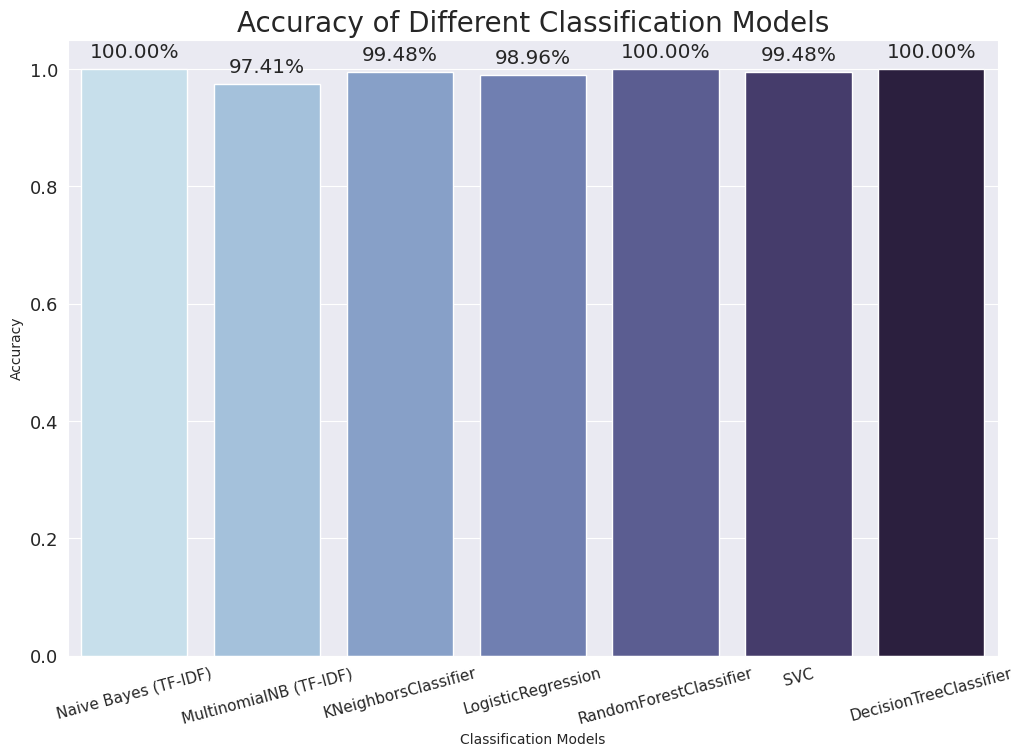

In [ ]:

# Appliquer la fonction améliorée aux CVs
data['cleaned_resume'] = data['Resume'].apply(clean_text)

# Encode labels
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])

# Vectorizing the cleaned resumes with TF-IDF
tfidf_v = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=5000, ngram_range=(1,3))
X_tfidf = tfidf_v.fit_transform(data['cleaned_resume']).toarray()

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['Category'], test_size=0.2, random_state=0)

# Define models
models = {
    'Naive Bayes (TF-IDF)': GaussianNB(),
    'MultinomialNB (TF-IDF)': MultinomialNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=200),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

# Train and evaluate models
accuracies = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy of {model_name} on test set: {accuracy:.4f}')

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x=list(models.keys()), y=accuracies, palette="ch:s=.25,rot=-.25", saturation=1.5)
plt.xlabel("Classification Models", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.title("Accuracy of Different Classification Models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment='center', rotation=15)
plt.yticks(fontsize=13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height * 1.02), ha='center', fontsize='x-large')
plt.show()


In [ ]:
# category_frequencies validation data

category_frequencies = y_test.value_counts()

# Réindexer les résultats pour les trier de 0 à n
category_frequencies = category_frequencies.reindex(range(len(le.classes_)), fill_value=0)

# Créer un DataFrame avec les étiquettes numériques, leur correspondance originale et la fréquence
category_frequencies_df = pd.DataFrame({
    'Numeric_Label': category_frequencies.index,
    'Original_Label': le.inverse_transform(category_frequencies.index),
    'Frequency': category_frequencies.values
})

category_frequencies_df

,Numeric_Label,Original_Label,Frequency
0,0,Advocate,3
1,1,Arts,3
2,2,Automation Testing,5
3,3,Blockchain,9
4,4,Business Analyst,6
5,5,Civil Engineer,5
6,6,Data Science,9
7,7,Database,7
8,8,DevOps Engineer,11
9,9,DotNet Developer,9


In [ ]:
#Save components
joblib.dump(tfidf_v, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(models['Naive Bayes (TF-IDF)'], 'nb_tfidf_model.pkl')

['nb_tfidf_model.pkl']

In [ ]:

tfidf_v = joblib.load('tfidf_vectorizer.pkl')
le = joblib.load('label_encoder.pkl')
nb_tfidf_model = joblib.load('nb_tfidf_model.pkl')


# Functions for prediction
def pdf_to_text(pdf_path):
    return extract_text(pdf_path)

def predict_category(model, pdf_path):
    cv_text = pdf_to_text(pdf_path)
    cleaned_cv_text = clean_text(cv_text)
    cv_vector = tfidf_v.transform([cleaned_cv_text]).toarray()
    predicted_category = model.predict(cv_vector)
    predicted_category_label = le.inverse_transform(predicted_category)
    return predicted_category_label[0]

def predict_category_text(model, cv_text):
    cleaned_cv_text = clean_text(cv_text)
    cv_vector = tfidf_v.transform([cleaned_cv_text]).toarray()
    predicted_category = model.predict(cv_vector)
    predicted_category_label = le.inverse_transform(predicted_category)
    return predicted_category_label[0]

# Example usage

# pdf_path = 'resumes/cv14.pdf'
# predicted_category = predict_category(models['Naive Bayes (TF-IDF)'], pdf_path)
# print(f'The predicted category for the given CV is: {predicted_category}')

In [ ]:


# Load the parsed DataFrame
df_parsed = pd.read_csv("train-data.csv")

# Predict and add the 'predicted_category' column to the DataFrame
predicted_categories = []
predicted_categories_rf=[]
predicted_categories_dt=[]

for index, row in df_parsed.iterrows():
    cv_text = row['Text']
    predicted_category = predict_category_text(models['Naive Bayes (TF-IDF)'],cv_text)
    predicted_categories.append(predicted_category)


    predicted_category_rf = predict_category_text(models['RandomForestClassifier'],cv_text)
    predicted_categories_rf.append(predicted_category_rf)

    predicted_category_dt = predict_category_text(models['DecisionTreeClassifier'],cv_text)
    predicted_categories_dt.append(predicted_category_dt)

df_parsed['predicted_category'] = predicted_categories
df_parsed['predicted_category_rf'] = predicted_categories_rf
df_parsed['predicted_category_dt'] = predicted_categories_dt
df_parsed



    # # Example with text input
    # cv_text = "Example resume text to predict"
    # predicted_category_text_result = predict_category_text(models['Naive Bayes (TF-IDF)'], cv_text)
    # print(f'The predicted category for the given text CV is: {predicted_category_text_result}')


,Filename,Text,Name,Education,Skills,Email,Phone,predicted_category,predicted_category_rf,predicted_category_dt
0,resumes/cv-wiem.pdf,Personal profile \n\nI am a passionate softwar...,Business Information Systems,"[""Bachelor's Degree in Business Computing ...","['french', 'communication', 'system', 'ui', 'g...",wiembenmlouka@gmail.com,+216 24313044,Operations Manager,Data Science,DevOps Engineer
1,resumes/cv-wiem2.pdf,Profile \n\nÉtudiante en 2ème année du program...,Wiem Ben Mlouka,['licence nationale en informatique de gestion...,"['communication', 'certification', 'system', '...",wiembenmlouka@gmail.com,+216 24313044,Data Science,DevOps Engineer,DevOps Engineer
2,resumes/cv1.pdf,"Kalash Jindal \n\n3rd year B Tech, Computer Sc...",Kalash Jindal,['Master Course '],"['chemicals', 'machine learning', 'coding', 'p...",jindalkalash298@gmail.com,+91-7839453651,Data Science,Data Science,Data Science
3,resumes/cv3.pdf,Sanket Sarwade\nData Scientist\n\nAs a highly ...,Sanket Sarwade\nData,['Bsc Microbiology\\n\\nSinhgad College of Sci...,"['visualization\\n', 'python\\n', 'machine lea...",sanketsarwade111@gmail.com,7798248452,Data Science,Advocate,Java Developer
4,resumes/cv2.pdf,Raphaël MARTIN \nINTITULÉ DU POSTE / STAGE \n\...,Raphaël MARTIN,['Licence Pro Commerce et Distribution \\n\\nU...,"['orange', 'communication', 'ai', 'distribution']",raphael.martin@gnail.com,06 06 06 06,Operations Manager,Advocate,Java Developer
5,resumes/cv4.pdf,Alexandre DUPONT \nP O S T E O C C U P É \n...,Alexandre DUPONT,['Licence de sciences et techniques des activi...,"['p', 'ai', 'gmail', 'c']",prenom.nom@gmail.com,6 66 66 66,Data Science,Health and fitness,Health and fitness
6,resumes/cv5.pdf,ç \n\nJade MARTIN \n\nAIDE-SOIGNANTE \n\nPROFI...,Jade MARTIN,['maîtrise parfaitement les gestes et les prot...,[],jade.martin@gnail.com,06 66 66 66,Operations Manager,Advocate,Java Developer
7,resumes/cv6.pdf,Marie DUPONT \n\nPOSTE OCCUPÉ/RECHERCHÉ \n\n06...,Marie DUPONT,['Maîtrise des techniques de soins du visage a...,['microsoft office'],marie.dupont@mail.com,06 12 34 56,Data Science,Advocate,Java Developer
8,resumes/cv7.pdf,PROFIL \n\nInfirmière diplômée possédant plus ...,Pack Office,['Baccalauréat g'],"['crm', 'excel']",alice.robert@mail.fr,6 66 66 66,Operations Manager,Advocate,Java Developer
9,resumes/cv8.pdf,Ryan Nelson\n\nF R E S H E R S O F T W A R E...,Ryan Nelson,[],"['ethics\\n', 'p', 'machine learning', 'coding...",NaN,NaN,Operations Manager,Python Developer,Data Science


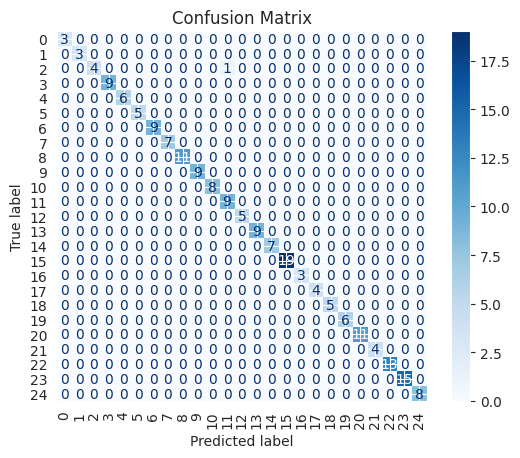

Accuracy: 99.48%


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Prédictions sur les données de test
y_pred = models['KNeighborsClassifier'].predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Calcul et affichage de la précision
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc * 100:.2f}%')

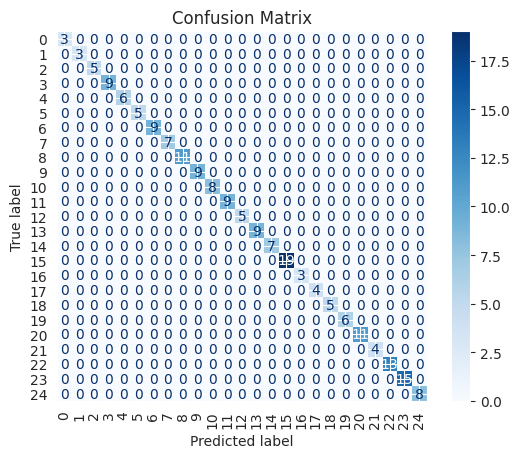

Accuracy: 100.00%


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Prédictions sur les données de test
y_pred = models['Naive Bayes (TF-IDF)'].predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Calcul et affichage de la précision
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc * 100:.2f}%')

## deep learning models : modèle BiLSTM

 prétraitement des données, construction du modèle, entraînement, évaluation,  prédiction des catégories de CV.

### Importation des bibliothèques nécessaires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.utils import to_categorical,plot_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf


# Téléchargement des stopwords pour le prétraitement
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### chargement et prétraitement des données

In [ ]:

# Tokenisation et vectorisation avec Tokenizer de Keras
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['cleaned_resume'])
X = tokenizer.texts_to_sequences(data['cleaned_resume'])
X = pad_sequences(X, maxlen=300, padding='post')

# Encodage des labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Category'])
y = to_categorical(y)

# Séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Construction et entraînement du modèle BiLSTM

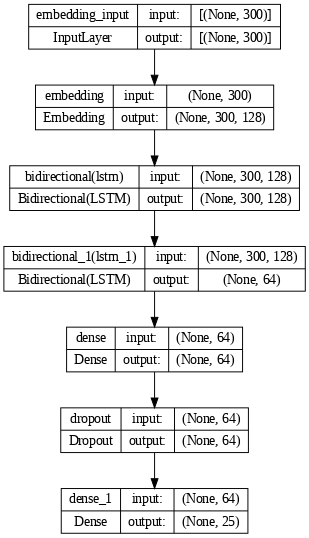

In [ ]:
# Construction du modèle BiLSTM
model = Sequential()
model.add(Embedding(5000, 128, input_length=300))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model,dpi=70,show_shapes=True)

In [ ]:

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
25/25 [==============================] - 43s 849ms/step - loss: 3.1920 - accuracy: 0.1014 - val_loss: 3.1223 - val_accuracy: 0.1969
Epoch 2/30
25/25 [==============================] - 24s 973ms/step - loss: 2.9712 - accuracy: 0.1743 - val_loss: 2.6769 - val_accuracy: 0.3109
Epoch 3/30
25/25 [==============================] - 19s 756ms/step - loss: 2.4821 - accuracy: 0.2731 - val_loss: 2.2447 - val_accuracy: 0.3679
Epoch 4/30
25/25 [==============================] - 20s 810ms/step - loss: 2.1069 - accuracy: 0.3862 - val_loss: 1.9038 - val_accuracy: 0.5181
Epoch 5/30
25/25 [==============================] - 18s 739ms/step - loss: 1.8037 - accuracy: 0.4629 - val_loss: 1.5556 - val_accuracy: 0.5596
Epoch 6/30
25/25 [==============================] - 19s 775ms/step - loss: 1.4492 - accuracy: 0.5943 - val_loss: 1.2171 - val_accuracy: 0.6736
Epoch 7/30
25/25 [==============================] - 21s 820ms/step - loss: 1.2225 - accuracy: 0.6528 - val_loss: 1.0259 - val_accuracy: 0.7720

### Évaluation du modèle

7/7 [==============================] - 3s 386ms/step - loss: 0.0407 - accuracy: 0.9948
Accuracy: 99.48%


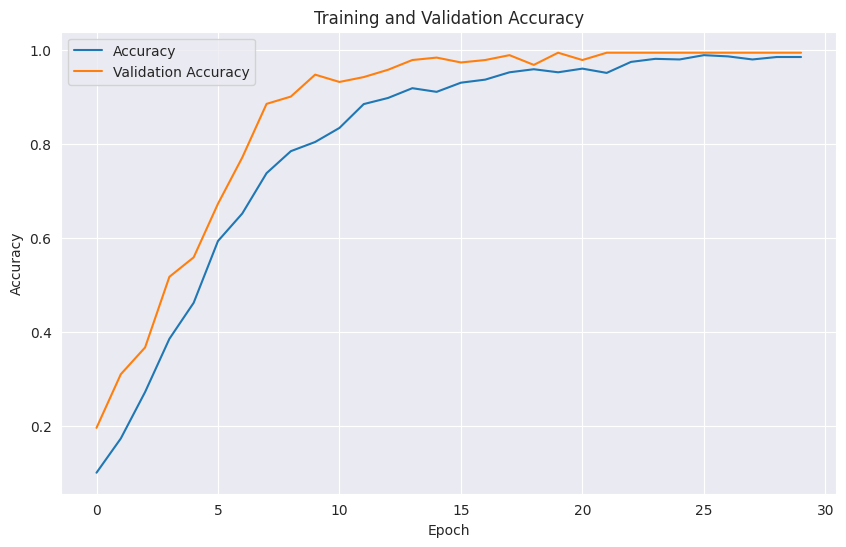

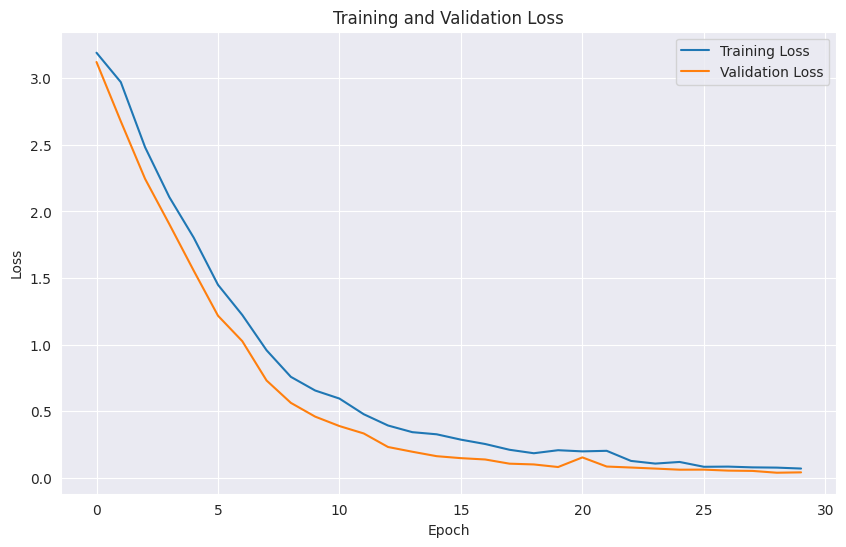

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Affichage des résultats d'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



### Matrice de confusion

7/7 [==============================] - 9s 313ms/step


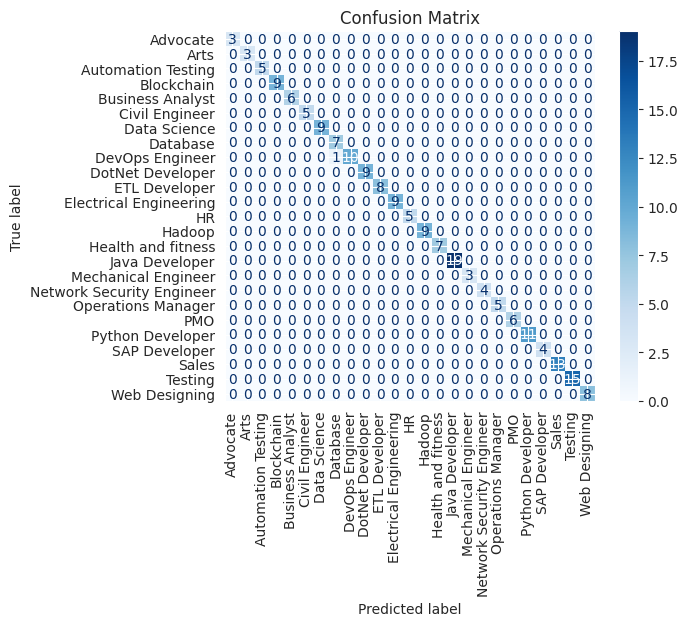

In [ ]:
# Prédictions sur les données de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Affichage de la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
cm_display = ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_)
cm_display.plot(xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

# Enregistrement du modèle
model.save('bilstm_resume_classifier.h5')

# Enregistrement du Tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    joblib.dump(tokenizer, tokenizer_file)

# Enregistrement du LabelEncoder
with open('label_encoder.pkl', 'wb') as label_encoder_file:
    joblib.dump(label_encoder, label_encoder_file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Fonction de prédiction pour un nouveau CV

In [ ]:
# Chargement du modèle
model = tf.keras.models.load_model('bilstm_resume_classifier.h5')

# Chargement du Tokenizer
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = joblib.load(tokenizer_file)

# Chargement du LabelEncoder
with open('label_encoder.pkl', 'rb') as label_encoder_file:
    label_encoder = joblib.load(label_encoder_file)

def predict_category(text, tokenizer, model, label_encoder):
    # Nettoyage du texte
    cleaned_text = clean_text(text)

    # Tokenisation et padding
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=300, padding='post')

    # Prédiction
    prediction = model.predict(padded_sequence)

    # Extraction de la catégorie avec le score le plus élevé
    predicted_category_index = np.argmax(prediction)
    predicted_category = label_encoder.inverse_transform([predicted_category_index])

    return predicted_category[0]

# Exemple d'utilisation
df = pd.read_csv("train-data.csv")

unknown_text = df['Text'][15]

predicted_category = predict_category(unknown_text, tokenizer, model, label_encoder)
print(f'Predicted Category: {predicted_category}')


1/1 [==============================] - 3s 3s/step
Predicted Category: Network Security Engineer


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,educ detail may may b e uit rgpv data scientis...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",educ detail mca ymcaust faridabad haryana data...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,comput skill profici m offic word basic excel ...
958,Testing,â Willingness to accept the challenges. â ...,willing ept challeng posit think good learner ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",person skill quick learner eager learn new thi...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,comput skill softwar knowledg m power point m ...


In [ ]:
# Prédire et ajouter la colonne 'predicted_category_bilstm' au DataFrame
predicted_categories = []
for index, row in df_parsed.iterrows():
    cv_text = row['Text']
    predicted_category = predict_category(cv_text, tokenizer, model, label_encoder)
    predicted_categories.append(predicted_category)

df_parsed['predicted_category_bilstm'] = predicted_categories

df_parsed

1/1 [==============================] - 0s 180ms/step


,Filename,Text,Name,Education,Skills,Email,Phone,predicted_category,predicted_category_rf,predicted_category_dt,predicted_category_bilstm
0,resumes/cv-wiem.pdf,Personal profile \n\nI am a passionate softwar...,Business Information Systems,"[""Bachelor's Degree in Business Computing ...","['french', 'communication', 'system', 'ui', 'g...",wiembenmlouka@gmail.com,+216 24313044,Operations Manager,Data Science,DevOps Engineer,SAP Developer
1,resumes/cv-wiem2.pdf,Profile \n\nÉtudiante en 2ème année du program...,Wiem Ben Mlouka,['licence nationale en informatique de gestion...,"['communication', 'certification', 'system', '...",wiembenmlouka@gmail.com,+216 24313044,Data Science,DevOps Engineer,DevOps Engineer,DevOps Engineer
2,resumes/cv1.pdf,"Kalash Jindal \n\n3rd year B Tech, Computer Sc...",Kalash Jindal,['Master Course '],"['chemicals', 'machine learning', 'coding', 'p...",jindalkalash298@gmail.com,+91-7839453651,Data Science,Data Science,Data Science,Data Science
3,resumes/cv3.pdf,Sanket Sarwade\nData Scientist\n\nAs a highly ...,Sanket Sarwade\nData,['Bsc Microbiology\\n\\nSinhgad College of Sci...,"['visualization\\n', 'python\\n', 'machine lea...",sanketsarwade111@gmail.com,7798248452,Data Science,Advocate,Java Developer,HR
4,resumes/cv2.pdf,Raphaël MARTIN \nINTITULÉ DU POSTE / STAGE \n\...,Raphaël MARTIN,['Licence Pro Commerce et Distribution \\n\\nU...,"['orange', 'communication', 'ai', 'distribution']",raphael.martin@gnail.com,06 06 06 06,Operations Manager,Advocate,Java Developer,DevOps Engineer
5,resumes/cv4.pdf,Alexandre DUPONT \nP O S T E O C C U P É \n...,Alexandre DUPONT,['Licence de sciences et techniques des activi...,"['p', 'ai', 'gmail', 'c']",prenom.nom@gmail.com,6 66 66 66,Data Science,Health and fitness,Health and fitness,DevOps Engineer
6,resumes/cv5.pdf,ç \n\nJade MARTIN \n\nAIDE-SOIGNANTE \n\nPROFI...,Jade MARTIN,['maîtrise parfaitement les gestes et les prot...,[],jade.martin@gnail.com,06 66 66 66,Operations Manager,Advocate,Java Developer,DevOps Engineer
7,resumes/cv6.pdf,Marie DUPONT \n\nPOSTE OCCUPÉ/RECHERCHÉ \n\n06...,Marie DUPONT,['Maîtrise des techniques de soins du visage a...,['microsoft office'],marie.dupont@mail.com,06 12 34 56,Data Science,Advocate,Java Developer,DevOps Engineer
8,resumes/cv7.pdf,PROFIL \n\nInfirmière diplômée possédant plus ...,Pack Office,['Baccalauréat g'],"['crm', 'excel']",alice.robert@mail.fr,6 66 66 66,Operations Manager,Advocate,Java Developer,DevOps Engineer
9,resumes/cv8.pdf,Ryan Nelson\n\nF R E S H E R S O F T W A R E...,Ryan Nelson,[],"['ethics\\n', 'p', 'machine learning', 'coding...",NaN,NaN,Operations Manager,Python Developer,Data Science,Civil Engineer


In [ ]:
df_parsed.to_csv("predicted_lables_nb_rf_dt_bilstm.csv", index=False, escapechar='\\')

## Modèle BERT (ne fonctionne pas )

### Importation des bibliothèques nécessaires



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical,plot_model
from transformers import BertTokenizer, TFBertModel
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Model,Sequential
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Téléchargement des stopwords pour le prétraitement
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Chargement et prétraitement des données

In [ ]:

# Tokenisation avec BERT :

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_sentences(sentences, tokenizer, max_len=128):
    input_ids = []
    attention_masks = []

    for sentence in sentences:
        encoded_dict = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf',
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = np.squeeze(np.array(input_ids), axis=1)
    attention_masks = np.squeeze(np.array(attention_masks), axis=1)

    return input_ids, attention_masks

X_input_ids, X_attention_masks = tokenize_sentences(data['cleaned_resume'], tokenizer)


# Encodage des labels :


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Category'])
y = to_categorical(y)


# Séparation des données d'entraînement et de test :


X_train_input_ids, X_test_input_ids, X_train_attention_masks, X_test_attention_masks, y_train, y_test = train_test_split(
    X_input_ids, X_attention_masks, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Construction et entraînement du modèle BERT

In [ ]:

bert_model = TFBertModel.from_pretrained('bert-base-uncased')


input_ids = tf.keras.layers.Input(shape=(128,), dtype='int32', name='input_ids')
attention_masks = tf.keras.layers.Input(shape=(128,), dtype='int32', name='attention_masks')
bert_output = bert_model([input_ids, attention_masks])

pooled_output = bert_output.pooler_output  # or bert_output.last_hidden_state, depending on your BERT model


# Appliquer les couches supplémentaires
output = tf.keras.layers.Dense(units=1024, activation='relu')(pooled_output)
output = tf.keras.layers.BatchNormalization()(output)
output = tf.keras.layers.Dropout(0.25)(output)
output = tf.keras.layers.Dense(units=512, activation='relu')(output)
output = tf.keras.layers.Dropout(0.25)(output)
output = tf.keras.layers.Dense(units=256, activation='relu')(output)
output = tf.keras.layers.BatchNormalization()(output)
output = tf.keras.layers.Dropout(0.25)(output)
output = tf.keras.layers.Dense(units=128, activation='relu')(output)
output = tf.keras.layers.Dropout(0.25)(output)
output = tf.keras.layers.Dense(units=64, activation='relu')(output)
output = tf.keras.layers.Dense(units=len(label_encoder.classes_), activation='softmax')(output)

model = Model(inputs=[input_ids, attention_masks], outputs=output)
model.layers


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

[]

In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
Total params: 110973721 (423.33 MB)
Trainable params: 110971161 (423.32 MB)
Non-trainable params: 2560 (10.00 KB)
__________________________________________________________________________________________________


In [ ]:

# Compilation et entraînement du modèle :

optimizer = Adam(learning_rate=2e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    [X_train_input_ids, X_train_attention_masks],
    y_train,
    epochs=23,
    batch_size=32,
    validation_data=([X_test_input_ids, X_test_attention_masks], y_test)
)

Epoch 1/23
25/25 [==============================] - 83s 1s/step - loss: 0.0890 - accuracy: 0.9909 - val_loss: 0.0968 - val_accuracy: 1.0000
Epoch 2/23
25/25 [==============================] - 22s 892ms/step - loss: 0.0496 - accuracy: 0.9987 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 3/23
25/25 [==============================] - 21s 854ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 4/23
25/25 [==============================] - 22s 892ms/step - loss: 0.0230 - accuracy: 0.9987 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 5/23
25/25 [==============================] - 22s 890ms/step - loss: 0.0167 - accuracy: 0.9987 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 6/23
25/25 [==============================] - 21s 852ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7/23
25/25 [==============================] - 22s 889ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Ep

KeyboardInterrupt: 

### Évaluation du modèle

In [ ]:
# Évaluation du modèle
loss, accuracy = model.evaluate([X_test_input_ids, X_test_attention_masks], y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Affichage des résultats d'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


7/7 [==============================] - 2s 239ms/step - loss: 0.0761 - accuracy: 0.9948
Accuracy: 99.48%


NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>

### Matrice de confusion

In [ ]:
# Prédictions sur les données de test
y_pred = model.predict([X_test_input_ids, X_test_attention_masks])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Affichage de la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
cm_display = ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_)
cm_display.plot(xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


### Fonction de prédiction pour un nouveau CV

In [ ]:
def predict_category(text, tokenizer, model, label_encoder):
    # Nettoyage du texte
    cleaned_text = clean_text(text)

    # Tokenisation et création des masques d'attention
    encoded_dict = tokenizer.encode_plus(
        cleaned_text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='tf',
    )

    input_ids = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask']

    # Prédiction
    prediction = model.predict([input_ids, attention_mask])

    # Extraction de la catégorie avec le score le plus élevé
    predicted_category_index = np.argmax(prediction, axis=1)
    predicted_category = label_encoder.inverse_transform(predicted_category_index)

    return predicted_category[0]

# Exemple d'utilisation
df = pd.read_csv("train-data.csv")
unknown_text = df['Text'][10]

# Prédiction de la catégorie pour le texte inconnu
predicted_category = predict_category(unknown_text, tokenizer, model, label_encoder)
print(f'Predicted Category: {predicted_category}')


In [ ]:
# Prédire et ajouter la colonne 'predicted_category_bert' au DataFrame
predicted_categories = []
for index, row in df.iterrows():
    cv_text = row['Text']
    predicted_category = predict_category(cv_text, tokenizer, model, label_encoder)
    predicted_categories.append(predicted_category)

df['predicted_category_bert'] = predicted_categories

df

In [ ]:
# Sauvegarde du modèle
model.save('bert_model.h5')

# Sauvegarde du tokenizer
tokenizer.save_pretrained('bert_tokenizer')

# Sauvegarde du label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

In [ ]:
data

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient ms office word basi...
958,Testing,â Willingness to accept the challenges. â ...,willingness ept challenges positive thinking g...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness learn ...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...


# **flask**



### extracting information (parsing)

In [ ]:

# Fonction pour extraire le texte d'un PDF
def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

# Fonction pour extraire les numéros de téléphone d'un texte
def extract_phone_numbers(text):
    pattern = r'\+?\d{1,3}[-.\s]?\(?\d{2,4}\)?[-.\s]?\d{2,4}[-.\s]?\d{2,9}'
    match = re.search(pattern, text)
    return match.group() if match else None

# Fonction pour extraire l'adresse email d'un texte
def extract_email_from_resume(text):
    pattern = r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b"
    match = re.search(pattern, text)
    return match.group() if match else None

# Fonction pour extraire les compétences d'un texte en utilisant une liste prédéfinie
def load_skills_from_csv(csv_file):
    # Charger le fichier CSV
    df = pd.read_csv(csv_file)
    # Supposons que la colonne contenant les compétences est nommée 'Skill'
    skills_list = df['Skill'].tolist()
    return skills_list

def extract_skills_from_resume(text, skills_list):
    skills_found = []

    for skill in skills_list:
        pattern = r"\b{}\b".format(re.escape(skill))
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            skills_found.append(skill)

    # Nettoyer les compétences trouvées
    cleaned_skills = list(set([skill.strip().replace('\n', '') for skill in skills_found if skill.strip()]))
    return cleaned_skills

# Fonction pour extraire les informations d'éducation d'un texte
def extract_education_from_resume(text):
    pattern = r"(?i)(?:\b(?:B\.?Sc\.?|Bac(?:calauréat|calaureate)?|Bachelor(?:'s)?|Licence|BTS)\b|(?:M\.?Sc\.?|Mast(?:er)?|Maîtrise)\b|(?:Ph\.?D\.?|Doctorate|Doctorat)\b)\s*(?:[a-zA-Z]+\s*)*(?:\b(?:en|in)\s*\b)?(?:[a-zA-Z]+\s*)*"
    edu_found= re.findall(pattern, text)
    cleaned_edu = list(set([edu.strip().replace('\n', '') for edu in edu_found if edu.strip()]))
    return cleaned_edu

# Fonction pour extraire le nom à partir d'un texte
def extract_name_from_resume(text):
    pattern = r"\b([A-Z][a-zA-Zéèêëàâäîïôöûüùç]+(?:\s[A-Z][a-zA-Zéèêëàâäîïôöûüùç]+){1,2}|[A-Z][a-zA-Zéèêëàâäîïôöûüùç]+(?:\s[A-Z]+)+)\b"
    match = re.search(pattern, text)
    return match.group() if match else None

# Fonction principale pour extraire toutes les informations d'un CV
def parse_resume(pdf_path, skills_csv):
    text = extract_text_from_pdf(pdf_path)
    skills_list = load_skills_from_csv(skills_csv)
    name = extract_name_from_resume(text)
    education = extract_education_from_resume(text)
    skills = extract_skills_from_resume(text, skills_list)
    email = extract_email_from_resume(text)
    phone = extract_phone_numbers(text)
    resume_data = {
        'Filename': pdf_path,
        'Text': text,
        'Name': name,
        'Education': education,
        'Skills': skills,
        'Email': email,
        'Phone': phone
    }
    print('kakakakakakaka', resume_data['Skills'][0])
    #df = pd.DataFrame([resume_data])
    return resume_data

def parse_resume_skills(pdf_path):
  skills_csv = "skills.csv"
  return parse_resume(pdf_path, skills_csv)


def parse_resume_text_api(text):
  skills_csv = "skills.csv"
  skills_list = load_skills_from_csv(skills_csv)
  name = extract_name_from_resume(text)
  education = extract_education_from_resume(text)
  skills = extract_skills_from_resume(text, skills_list)
  email = extract_email_from_resume(text)
  phone = extract_phone_numbers(text)
  resume_data = {
      'Name': name,
      'Education': education,
      'Skills': skills,
      'Email': email,
      'Phone': phone
  }

  #df = pd.DataFrame([resume_data])
  return resume_data





### prediction category

In [ ]:
import re
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pdfminer.high_level import extract_text
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct
from nltk.stem.wordnet import WordNetLemmatizer

# Load the data
data = pd.read_csv('UpdatedResumeDataSet.csv')

# ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Fonction améliorée pour nettoyer le texte
def clean_text(text):

    text = re.sub(r'http\S+', ' ', text)  # remove URLs
    text = re.sub(r'RT|cc', ' ', text)  # remove RT and cc
    text = re.sub(r'@\S+', '  ', text)  # remove mentions
    text = re.sub(r'[^\w\s]', ' ', text)  # remove punctuation
    text = re.sub(r'\d+', ' ', text)  # remove digits
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    text = re.sub(r'[^\x00-\x7f]', r' ', text)  # remove non-ascii characters

    text = clean_html(text)
    text = remove_(text)
    text = removeStopWords(text)
    text = remove_digits(text)
    text = remove_links(text)
    text = remove_special_characters(text)
    text = punct(text)
    text = non_ascii(text)
    text = email_address(text)
    text = lower(text)


    # Initialiser le PorterStemmer et le WordNetLemmatizer
    ps = PorterStemmer()
    wl = WordNetLemmatizer()

    # Définir les stopwords en anglais et enlever 'not'
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')

    # Supprimer les caractères non alphabétiques


    # Convertir le texte en minuscules et le séparer en mots
    words = text.split()

    # Supprimer les mots de moins de 3 caractères et les stopwords, puis appliquer la lemmatisation

    # Supprimer les stopwords, puis appliquer la lemmatisation puis la racinisation
    words = [ps.stem(wl.lemmatize(word)) for word in words if word not in set(all_stopwords)]

    # Joindre les mots en une seule chaîne de caractères
    cleaned_text = ' '.join(words)

    return cleaned_text.strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:

tfidf_v = joblib.load('tfidf_vectorizer.pkl')
le = joblib.load('label_encoder.pkl')
nb_tfidf_model = joblib.load('nb_tfidf_model.pkl')


def predict_category_text_api(cv_text):
    cleaned_cv_text = clean_text(cv_text)
    cv_vector = tfidf_v.transform([cleaned_cv_text]).toarray()
    predicted_category = nb_tfidf_model.predict(cv_vector)
    predicted_category_label = le.inverse_transform(predicted_category)
    return predicted_category_label[0]

# Example usage



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.3.2. This might lead to breaking code or

### recoommendation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_resumes(criteria, list_candidates):

    all_resumes_df = pd.DataFrame(list_candidates)

    # Apply vectorization and cosine similarity on the skills
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_resumes_df['skills'].apply(lambda x: ' '.join(x.split(','))))

    criteria_vector = vectorizer.transform([criteria])
    cosine_sim = cosine_similarity(criteria_vector, tfidf_matrix).flatten()

    all_resumes_df['Similarity'] = cosine_sim
    df_filtered = all_resumes_df[all_resumes_df['Similarity'] > 0]
    df_sorted = df_filtered.sort_values(by='Similarity', ascending=False)
    recommendations = df_sorted.to_dict('records')
    return recommendations


def matching_resumes_with_job(criteria, list_candidates):

    all_resumes_df = pd.DataFrame(list_candidates)

    # Apply vectorization and cosine similarity on the skills
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_resumes_df['skills'].apply(lambda x: ' '.join(x.split(','))))

    criteria_vector = vectorizer.transform([criteria])
    cosine_sim = cosine_similarity(criteria_vector, tfidf_matrix).flatten()

    all_resumes_df['Similarity'] = cosine_sim

    df_sorted = all_resumes_df.sort_values(by='Similarity', ascending=False)
    recommendations = df_sorted.to_dict('records')
    return recommendations

### flask api

In [ ]:
!pip install flask_ngrok pyngrok
!ngrok authtoken 2hCy2lYkcaa3ZNuIhi9qTkAJSnj_7GV84VkwWZWCoxR7TWAtt

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok
from io import BytesIO

app = Flask(__name__)
run_with_ngrok(app)




@app.route('/parse', methods=['POST'])
def parse_resume_flask2():
    if 'pdf_file' not in request.files:
        return jsonify({'error': 'No file part'}), 400
    pdf_file = request.files['pdf_file']
    if pdf_file.filename == '':
        return jsonify({'error': 'No selected file'}), 400
    # Lire le fichier PDF dans un BytesIO
    pdf_stream = BytesIO(pdf_file.read())
    # Extraire le texte du PDF
    text = extract_text(pdf_stream)
    # Fermer le flux
    pdf_stream.close()
    # Traiter le texte extrait pour les informations
    result = parse_resume_text_api(text)
    result['category']=predict_category_text_api(text)
    print(result)
    response = jsonify(result)
    response.headers.add('Content-Type', 'application/json; charset=utf-8')
    return response


@app.route('/recommend', methods=['POST'])
def recommend():
    data = request.json
    criteria = data.get('criteria')
    candidates = data.get('candidates', [])

    recommendations=recommend_resumes(criteria, candidates)

    return recommendations


@app.route('/matching', methods=['POST'])
def matching():
    data = request.json
    criteria = data.get('criteria')
    candidates = data.get('candidates', [])


    recommendations=matching_resumes_with_job(criteria, candidates)


    return recommendations





ngrok_tunnel = ngrok.connect(5000)
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://e553-34-141-133-89.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040
